In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import cv2
import numpy as np

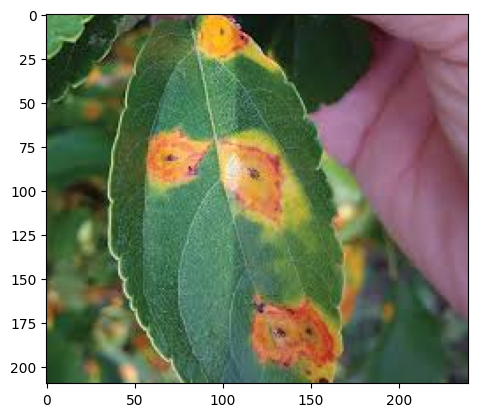

In [2]:
source=r"C:\Users\alami\Downloads\images (2).jpg"
img=cv2.imread(source)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()



In [3]:
image=tf.keras.preprocessing.image.load_img(source,target_size=(224,224))
array=tf.keras.preprocessing.image.img_to_array(image)
array=np.array([array])
print(array.shape)

(1, 224, 224, 3)


In [4]:
model=load_model(r"Densenet results/Densnetfine.keras")

In [5]:
pred=model.predict(array)

1/1 [==============================] - 5s 5s/step


In [6]:
pred.shape

(1, 23)

In [7]:
result=np.argmax(pred)
confidence=np.max(pred)
print(result)
print(f"Confidence: {100*(confidence):.2f} %")

14
Confidence: 99.43 %


In [8]:
classes=["Apple Scab",
    "Apple Black Rot",
    "Apple Cedar Apple Rust",
    "Apple Healthy",
    "Cherry (Including Sour) Powdery Mildew",
    "Cherry (Including Sour) Healthy",
    "Corn (Maize) Cercospora Leaf Spot/Grey Leaf",
    "Corn (Maize) Common Rust",
    "Corn (Maize) Northern Leaf Blight",
    "Corn (Maize) Healthy",
    "Potato Early Blight",
    "Potato Late Blight",
    "Potato Healthy",
    "Tomato Bacterial Spot",
    "Tomato Early Blight",
    "Tomato Late Blight",
    "Tomato Leaf Mold",
    "Tomato Septoria Leaf Spot",
    "Tomato Spider Mites/two spotted",
    "Tomato Target Spot",
    "Tomato Yellow Leaf Curl Virus",
    "Tomato Mosaic Virus",
    "Tomato Healthy"]

In [9]:
print(f"Class: {classes[result]}")
print(f"Confidence: {100*(confidence):.2f}%")

Class: Tomato Early Blight
Confidence: 99.43%


In [18]:
top_indices = np.argsort(pred[0])[-3:][::-1]  

print("\nTop 3 Predictions:")
for i, idx in enumerate(top_indices):
    print(f"{i+1}. Class: {classes[idx]} - Confidence: {100 * pred[0][idx]:.2f}%")


Top 3 Predictions:
1. Class: Apple Cedar Apple Rust - Confidence: 100.00%
2. Class: Apple Black Rot - Confidence: 0.00%
3. Class: Corn (Maize) Cercospora Leaf Spot/Grey Leaf - Confidence: 0.00%
